<a href="https://colab.research.google.com/github/kstyle2198/NLP_TIPS/blob/main/String_Matching_Algorithm(%ED%98%95%ED%83%9C%EC%A0%81_%EA%B1%B0%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@abhit_m/5-python-string-matching-algorithm-every-data-analyst-should-know-part-ii-e7a1b888564e

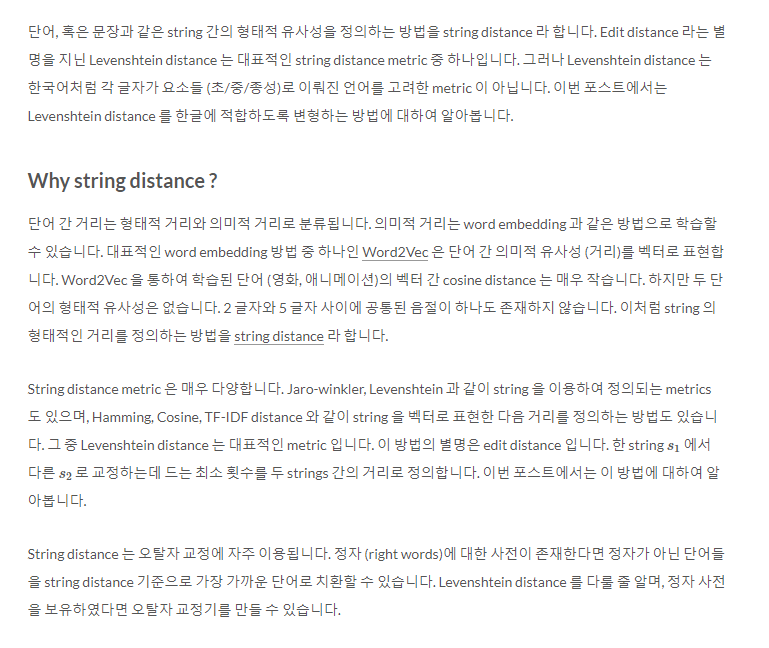

# 단순 형태적 거리 계산

In [184]:
# !pip install fuzzywuzzy
# !pip install jellyfish
# !pip install Levenshtein
# !pip install textdistance
# !pip install py_stringmatching
# !pip install metaphone

In [185]:
# str1 = "delegate"
# str2 = "delete"

# str1 =  "I like a apple"
# str2 =  "I like apples"

str1 = "light signal column"
str2 = "lightsignalcolumn"

In [186]:
from rapidfuzz import fuzz
# Example strings

ratio = fuzz.ratio(str1, str2)

print(f": fuzz.ratio: {ratio}")  # 완전히 같으면 100

: fuzz.ratio: 94.44444444444444


In [187]:
import jellyfish
jellyfish.levenshtein_distance(str1, str2) # 완전히 같으면 0 (수정할게 없으까.. edit distance)

2

In [188]:
import Levenshtein
Levenshtein.distance(str1, str2)

2

In [189]:
import textdistance
textdistance.levenshtein(str1, str2)

2

In [191]:
from py_stringmatching import Jaccard

# Initialize the Jaccard similarity measure
jaccard = Jaccard()

# Example strings
# str1 = "apple banana orange"
# str2 = "banana orange kiwi"

# Compute Jaccard similarity
similarity = jaccard.get_sim_score(str1.split(), str2.split())

print(f"Jaccard Similarity: {similarity}")  # 완전히 같으면 1.. (칸 띄움 중요.. 형태소로 비교)

Jaccard Similarity: 0.0


# 음성 색인화 알고리즘
- Metaphone은 1990년 Lawrence Phillips가 발표한 영어 발음으로 단어를 색인화하는 음성 알고리즘입니다.
- Phillips는 나중에 Double Metaphone이라는 새로운 버전의 알고리즘을 만들었습니다. 영어에만 적용이 제한된 원래 알고리즘과 달리 이 버전은 다른 많은 언어의 철자 특성을 고려합니다. 등등

In [192]:
from metaphone import doublemetaphone

# Example words
# word1 = "church"
# word2 = "charge"

# Compute Double Metaphone codes
code1 = doublemetaphone(str1)
code2 = doublemetaphone(str2)

print(f"Double Metaphone for '{str1}': {code1}")
print(f"Double Metaphone for '{str2}': {code2}")

Double Metaphone for 'light signal column': ('LTSNLKLMN', 'LTSKNLKLMN')
Double Metaphone for 'lightsignalcolumn': ('LTSNLKLMN', 'LTSKNLKLMN')


In [193]:
ratio = fuzz.ratio(code1, code2)
print(f": Metaphone 유사도: {ratio}")  # 완전히 같으면 100

: Metaphone 유사도: 100.0


In [194]:
code1, code2

(('LTSNLKLMN', 'LTSKNLKLMN'), ('LTSNLKLMN', 'LTSKNLKLMN'))

In [195]:
Levenshtein.distance(code1, code2)

0

# Sequence Matcher

In [196]:
import difflib

# Example code snippets

# Create a Differ object
differ = difflib.Differ()
# Compare the code snippets
diff = differ.compare(str1.splitlines(), str2.splitlines())
# Print the differences
print('\n'.join(diff))

- light signal column
?      -      -

+ lightsignalcolumn


In [197]:
answer_bytes = bytes(str1, 'utf-8')
input_bytes = bytes(str2, 'utf-8')
answer_bytes_list = list(answer_bytes)
input_bytes_list = list(input_bytes)

sm = difflib.SequenceMatcher(None, answer_bytes_list, input_bytes_list)
similar = sm.ratio()
similar

0.9444444444444444

# 결과모음

In [198]:
print(f"str1: {str1}")
print(f"str2: {str2}")
print()

print(f"fuzz.ratio: {ratio}")  # 완전히 같으면 100
print(f"Levenshtein Distance : {Levenshtein.distance(str1, str2)}") # 완전히 같으면 0 (수정할게 없으까.. edit distance)
print(f"Jaccard Similarity: {similarity}")  # 완전히 같으면 1.. (칸 띄움 중요.. 형태소로 비교)
print(f"Metaphone 유사도: {ratio}")  # 완전히 같으면 100
print(f"Sequence Matcher: {similar}") # 완전히 같으면 1

str1: light signal column
str2: lightsignalcolumn

fuzz.ratio: 100.0
Levenshtein Distance : 2
Jaccard Similarity: 0.0
Metaphone 유사도: 100.0
Sequence Matcher: 0.9444444444444444
